<h1><center>Probability Distributions</center></h1>

<center><img src= "https://miro.medium.com/max/497/1*c2ylMCItL1XG6O3mGhjzng.png" ></center>

## Objectives 

- Probability Distributions (why are they important in Data Careers)  
- Define Probability Distributions 
- Different Types of Probability Distribution
- Probability Mass Function (PMF)
- Probabiity Density Function (PDF)
- PMF vs. PDF 

## Probability Distributions (why should you care?) 

- Distributions of data can determine what analytics you perform and what model you utilize 
- Predicting number of car crashes during a specific time period (Poisson) 
- Predicting water pump failure (Bernoulli)
- And more busniess use cases!

<center><img src = "https://coverager.com/wp-content/uploads/2021/03/6-Crash-Types-visual-1024x569.png"></center>

## Definition of a Probability Distribution 
- A stats function of all the possible values and likelihoods that a random variable can take
    - Random Var can be any discrete or continuous numeric variable (height, weight, number of eggs in a basket)

## Types of Probability Distribution 

<center><img src= "https://bernard-mlab.com/images/common-distribution_huec055ab3bd48482f92384431f8f73d3e_75898_900x500_fit_box_2.png"></center>

<center><img src= "https://www.datasciencecentral.com/wp-content/uploads/2021/10/3969609986-1.png"></center>

### Bernoulli Distribution (PMF)
- A **SINGLE** trial of an outcome's successes/failures 
    - Winning or losing a single game
    - A single toss of a unbiased (fair) coin
    - Washing a single load of clothes to see if articles shrink or not 
    
<center><img src = "http://probabilitycourse.com/images/chapter3/bernoulli(p)%20color.png"></center>

### Binomial Distribution (PMF)
- Many **bernoulli/single** trials (the child of the bernoulli!!) 
    - Washing 10 loads of laundry and getting the probabilities of shrinkage for each load
    - Probability of winning or losing a season of games
    - Tossing a coin 30 times for 20 trials 
    
    <center><img src= "https://www.statology.org/wp-content/uploads/2021/01/bernoulli2-1-768x718.png"></center>

### Normal Distribution (PDF)
- Widely used in Data Science (height, standardized tests' scores, weight, etc)
- Continuous probability distribution that is symmetric about the mean
    - Mean = Median = Mode
- Area under the curve = 1
- Can be standardized (more on that later)

<center>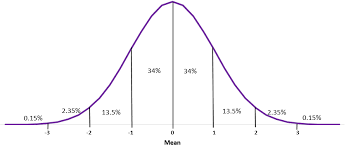</center>

## Probability Mass Function 
- Probability for a value for a **discrete** random variable (die, coin flips)

<center><img src = "https://hadrienj.github.io/assets/images/3.1/mass.png"></center>

In [81]:
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt

#Syntax:  scipy.stats.binom.pmf(r,n, p)
       # r is a list of integers from 0 to n, inclusive.
       # n the total number of trials or times the experiment will be carried out
       # p the probability that the outcome of a single experiment will be a success. 
           #the value of p must be between 0 and 1, inclusive.
        

n = 20 #num of trials 
p = 0.50 #probability of success -- let's say it is a fair coin
size = 25 #how many of the trials I want to do 

data_binom = binom.rvs(n=n, p=p, size=size)

data_binom

array([ 7, 12,  6,  8,  7, 12,  9,  7,  7, 10, 10,  8, 11,  8,  9,  9,  6,
       10, 12,  8, 11,  9,  9,  8, 14])

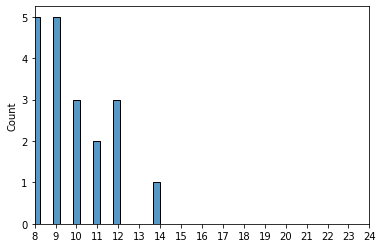

In [82]:
#Tie it back with the output above!

fig, ax = plt.subplots()

sns.histplot(data_binom, ax = ax, bins=25)
ax.set_xlim(8,24)
ax.set_xticks(range(8,25))
plt.show()

In [22]:
#YOU'VE SEEN THESE TYPE OF PLOTS IN DATA BEFORE USING HISTOGRAMS

import pandas as pd 

df = pd.read_csv("data/king_county.csv")

In [23]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0


In [53]:
x = df["grade"].value_counts()


<AxesSubplot:xlabel='grade', ylabel='count'>

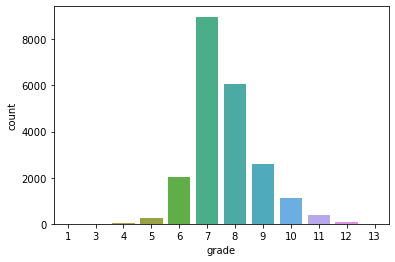

In [49]:
sns.countplot(x="grade", data=df)

## Probability Density Function 

- Total area under the curve = 1
- Probability of a continuous random variable lying within a certain **range** of values 
- We use a **range** because the probability at any single point is = 0 
- Can't calculate the probability AT a certain point but we can **look around it**

In [79]:
#Standard normal distribution centered at 0 with a sd of 1 probability of being LESS than my x

import scipy.stats as stats

x = 1.5 #x-value (z-score bc standard normal) of interest 
cdf_value = stats.norm.cdf(x,loc=0,scale=1)
cdf_value

print(f'Probability of obtaining a value LESS THAN: {x} is {cdf_value}')

Probability of obtaining a value LESS THAN: 1.5 is 0.9331927987311419


In [61]:
#Probability of being GREATER than my x

x = 1.5
cdf_value = 1 - stats.norm.cdf(x,loc=0,scale=1)
cdf_value


0.06680720126885809

### Going back to the dataset! 

### I am interested the probability of a home in my dataset that is less than 2,200 of sqft_living space...

In [77]:
#Get the mean and standard deviation from a .describe() 
#Remember I am interested in continuous variables 

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000


In [75]:
stats.norm.cdf(2200, 2000, 918)

0.58623282126848

<h1><center>The End</center></h1>

In [83]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "white",
        "transition": "fade",
        "start_slideshow_at": "selected",
        "footer": "  <h3>Learning with Jelly</h3>",
        "header": "  <h2>Python (Stats) - Probability Distributions</h2>",
        "enable_chalkboard": True
     }
)

{'theme': 'white',
 'transition': 'fade',
 'start_slideshow_at': 'selected',
 'autolaunch': False,
 'width': '100%',
 'height': '100%',
 'header': '  <h2>Python (Stats) - Probability Distributions</h2>',
 'footer': '  <h3>Learning with Jelly</h3>',
 'scroll': True,
 'enable_chalkboard': True,
 'slideNumber': True,
 'center': False,
 'controlsLayout': 'edges',
 'hash': True}